# Advection equation

Given the advection equation in 1D $\frac{\delta u}{\delta t} + \frac{\delta u}{\delta t} = 0$ build a numerical code to solve it on a grid with extent $x \in [0, 10]$ and with initial conditions given by

$$u(x, t=0) = exp[-(x-x_0)^2], $$

with $x_0 = 5$. Solve the equation using the following schemes:

1. FTCS
2. Lax-Friedrichs
3. Leapfrog
4. Lax-Wendroff

Use Courant factor $c_f = 0.5$ and compare the results obtained with the different methods, paying attention to their stability and dissipation properties. Plot $u(x, t)$ at different times (including $t = 0$ and $t = 20$) and the evolution of the L2-norm of $u(x, t)$. Use at least $J = 101$
points in the $x$ direction, so that the spacing $∆x$ is at least $0.1 = \frac{10}{(J − 1)}$, and terminate your simulation at $t = 20$. Use periodic boundary conditions. Modify the number of points and/or the Courant factor cf to check how your results change.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import imageio.v2 as imageio
from IPython.display import HTML

In [2]:
plt.rcParams.update({
    "text.usetex": True,            # Use LaTeX for text rendering
    "font.family": "serif",         # Use serif fonts (LaTeX default)
    "font.serif": ["Computer Modern Roman"],  # Default LaTeX font
})

In [11]:
#define the speed a
a=1.0

# Define the domain
L = 10.0     # Domain length
nx = 101    # Number of grid points
dx = L/(nx-1)   # Grid spacing
x = np.linspace(0, L, nx)

# Define the time step and the final time
cf = 0.5
dt = cf*dx/a   # Time step
t_final = 20.0

print('nx=',nx)
print('dx=',dx)
print('dt=',dt)
print('Number of iterations=',t_final/dt)

nx= 101
dx= 0.1
dt= 0.05
Number of iterations= 400.0


In [12]:
# Define the initial condition
x0=5
u_initial = np.exp(-(x-x0)**2)

## FTCS

In [22]:
# Initialize the solution array
u_current = u_initial.copy()

#we create arrays where we will store the time and the l2norm
l2norm_FTCS=[]
l2norm_FTCS.append(np.sqrt(np.sum(u_current**2)/len(u_current)))

time=[]
time.append(0.0)

In [17]:
# Create directory to save images if there isn't one yet
print(os.getcwd())
if not os.path.exists('./images_FTCS'):
    os.makedirs('./images_FTCS')
os.listdir('./')

C:\Users\lilit\reps\Numerical_relativity\Homework_1


['.ipynb_checkpoints',
 'Advection equation.ipynb',
 'images_FTCS',
 'images_LaxF',
 'images_Leap',
 'movie_FTCS.mp4',
 'movie_LaxF.mp4',
 'Numerical_Relativity_2025_exercise_01.pdf']

In [23]:
# Initialize time and iteration counter
t = 0.0
i = 0

#save the initial conditions
plt.plot(x, u_current, c = 'darkturquoise')
plt.title('Time='+str(round(t,2)))
plt.ylim(0,1.1)
plt.xlabel('x', fontsize = 13)
plt.ylabel('u', rotation = 0, labelpad = 10, fontsize = 13)
plt.grid(alpha = 0.2, c = 'grey')
plt.savefig('./images_FTCS/fig_'+str(i).zfill(5)+'.png', dpi=200)
plt.close()

#solve the advection equation
while t < t_final:
    # Compute the new solution using the FTCS method
    # Note: np.roll(u_current, -1) is equivalent to u(j+1) and
    #       np.roll(u_current,  1) is equivalent to u(j-1)
    # using np.roll is equivalent to use periodic boundary conditions
    u_next = u_current - a*dt/(2*dx)*(np.roll(u_current, -1) - np.roll(u_current, 1))
    #u_next = 0.5*(np.roll(u_current, -1) - np.roll(u_current, 1)) - a*dt/(2*dx)*(np.roll(u_current, -1) - np.roll(u_current, 1))
    
    # Update the solution
    u_current = u_next.copy()

    #advance the time 
    t += dt
    i += 1
    
    #compute the l2 norm and add the time to the time vector
    l2norm_FTCS.append(np.sqrt(np.sum(u_current**2)/len(u_current)))
    time.append(t)
    
    #plot the current result and save in an image every 10 iterations
    if (i%10==0):
        plt.plot(x, u_current, c = 'darkturquoise')
        plt.title('Time='+str(round(t,2)))
        plt.ylim(0,1.1)
        plt.xlabel('x', fontsize = 13)
        plt.ylabel('u', rotation = 0, labelpad = 10, fontsize = 13)
        plt.grid(alpha = 0.2, c = 'grey')
        plt.savefig('./images_FTCS/fig_'+str(i).zfill(5)+'.png', dpi=200)
        plt.close()

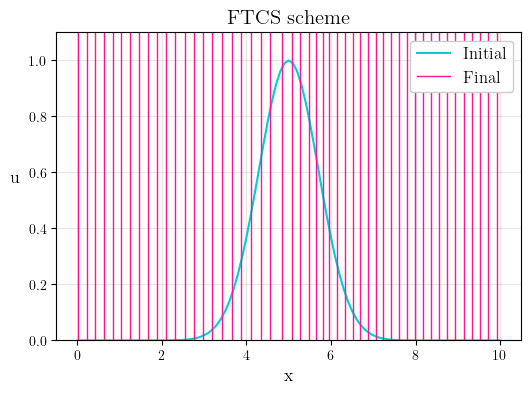

In [24]:
# Plot the final solution
plt.figure(figsize=(6, 4))
plt.plot(x, u_initial, label='Initial', c = 'darkturquoise')
plt.plot(x, u_current, label='Final', c = 'deeppink', lw = 1)
plt.title('FTCS scheme', fontsize = 15)
#plt.title('Time='+str(round(t,2)), fontsize = 15)
plt.ylim(0,1.1)
plt.xlabel('x', fontsize = 13)
plt.ylabel('u', rotation = 0, labelpad = 10, fontsize = 13)
plt.legend(fontsize = 12, framealpha = 1)
plt.grid(alpha = 0.2, c = 'grey')
plt.show()

In [25]:
# Check your current working directory
print(os.getcwd())

# Set the directory where the images are stored
directory = "./images_FTCS/"

files = os.listdir(directory)
files = sorted(files)
print("\nSorted files:", files)
       
# Create the movie
with imageio.get_writer('./movie_FTCS.mp4', mode='I', quality=10) as writer:
    for file in files:
        image = imageio.imread(os.path.join(directory, file))
        writer.append_data(image)

C:\Users\lilit\reps\Numerical_relativity\Homework_1

Sorted files: ['fig_00000.png', 'fig_00010.png', 'fig_00020.png', 'fig_00030.png', 'fig_00040.png', 'fig_00050.png', 'fig_00060.png', 'fig_00070.png', 'fig_00080.png', 'fig_00090.png', 'fig_00100.png', 'fig_00110.png', 'fig_00120.png', 'fig_00130.png', 'fig_00140.png', 'fig_00150.png', 'fig_00160.png', 'fig_00170.png', 'fig_00180.png', 'fig_00190.png', 'fig_00200.png', 'fig_00210.png', 'fig_00220.png', 'fig_00230.png', 'fig_00240.png', 'fig_00250.png', 'fig_00260.png', 'fig_00270.png', 'fig_00280.png', 'fig_00290.png', 'fig_00300.png', 'fig_00310.png', 'fig_00320.png', 'fig_00330.png', 'fig_00340.png', 'fig_00350.png', 'fig_00360.png', 'fig_00370.png', 'fig_00380.png', 'fig_00390.png', 'fig_00400.png']


In [26]:
# Displaying the movie

HTML("""
<div align="middle">
<video width="50%" controls>
      <source src="./movie_FTCS.mp4" type="video/mp4">
</video></div>""")

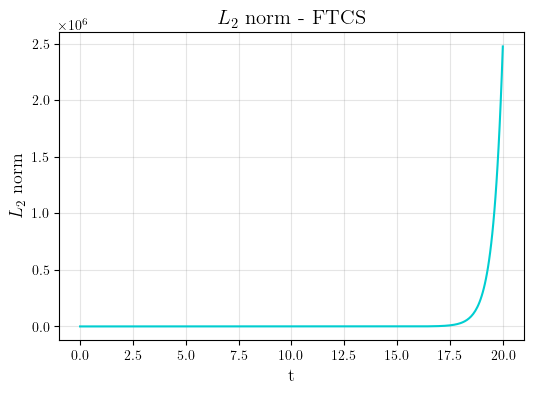

In [28]:
# Plot the l2 norm
plt.figure(figsize=(6, 4))
plt.plot(time, l2norm_FTCS, c = 'darkturquoise')
plt.title('$L_2$ norm - FTCS', fontsize = 15)
plt.xlabel('t', fontsize = 13)
plt.ylabel('$L_2$ norm', fontsize = 13)
plt.grid(alpha = 0.2, c = 'grey')
plt.show()

## Lax-Friedrichs

In [29]:
# Initialize the solution array
u_current = u_initial.copy()

#we create arrays where we will store the time and the l2norm
l2norm_LaxF=[]
l2norm_LaxF.append(np.sqrt(np.sum(u_current**2)/len(u_current)))

time=[]
time.append(0.0)

In [30]:
# Create directory to save images IF there isn't one yet
print(os.getcwd())
if not os.path.exists('./images_LaxF'):
    os.makedirs('./images_LaxF')
os.listdir('./')

C:\Users\lilit\reps\Numerical_relativity\Homework_1


['.ipynb_checkpoints',
 'Advection equation.ipynb',
 'images_FTCS',
 'images_LaxF',
 'images_Leap',
 'movie_FTCS.mp4',
 'movie_LaxF.mp4',
 'Numerical_Relativity_2025_exercise_01.pdf']

In [31]:
# Initialize time and iteration counter
t = 0.0
i = 0

#save the initial conditions
plt.plot(x, u_current, c = 'darkturquoise')
plt.title('Time='+str(round(t,2)))
plt.ylim(0,1.1)
plt.xlabel('x', fontsize = 13)
plt.ylabel('u', rotation = 0, labelpad = 10, fontsize = 13)
plt.grid(alpha = 0.2, c = 'grey')
plt.savefig('./images_LaxF/fig_'+str(i).zfill(5)+'.png', dpi=200)
plt.close()

#solve the advection equation
while t < t_final:
    # Compute the new solution using the Lax-Friedrichs method
    u_next = 0.5*(np.roll(u_current, -1) + np.roll(u_current, 1)) - a*dt/(2*dx)*(np.roll(u_current, -1) - np.roll(u_current, 1))
    
    # Update the solution
    u_current = u_next.copy()

    #advance the time 
    t += dt
    i += 1
    
    #compute the l2 norm and add the time to the time vector
    l2norm_LaxF.append(np.sqrt(np.sum(u_current**2)/len(u_current)))
    time.append(t)
    
    #plot the current result and save in an image every 10 iterations
    if (i%10==0):
        plt.plot(x, u_current, c = 'darkturquoise')
        plt.title('Time='+str(round(t,2)))
        plt.ylim(0,1.1)
        plt.xlabel('x', fontsize = 13)
        plt.ylabel('u', rotation = 0, labelpad = 10, fontsize = 13)
        plt.grid(alpha = 0.2, c = 'grey')
        plt.savefig('./images_LaxF/fig_'+str(i).zfill(5)+'.png', dpi=200)
        plt.close()

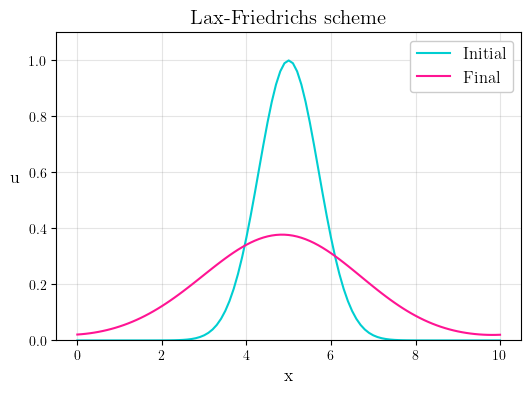

In [33]:
# Plot the final solution
plt.figure(figsize=(6, 4))
plt.plot(x, u_initial, label='Initial', c = 'darkturquoise')
plt.plot(x, u_current, label='Final', c = 'deeppink')
plt.title('Lax-Friedrichs scheme', fontsize = 15)
#plt.title('Time='+str(round(t,2)), fontsize = 15)
plt.ylim(0,1.1)
plt.xlabel('x', fontsize = 13)
plt.ylabel('u', rotation = 0, labelpad = 10, fontsize = 13)
plt.legend(fontsize = 12, framealpha = 1)
plt.grid(alpha = 0.2, c = 'grey')
plt.show()

In [34]:
# Check your current working directory
print(os.getcwd())

# Set the directory where the images are stored
directory = "./images_LaxF/"

files = os.listdir(directory)
files = sorted(files)
print("\nSorted files:", files)
       
# Create the movie
with imageio.get_writer('./movie_LaxF.mp4', mode='I', quality=10) as writer:
    for file in files:
        image = imageio.imread(os.path.join(directory, file))
        writer.append_data(image)

C:\Users\lilit\reps\Numerical_relativity\Homework_1

Sorted files: ['fig_00000.png', 'fig_00010.png', 'fig_00020.png', 'fig_00030.png', 'fig_00040.png', 'fig_00050.png', 'fig_00060.png', 'fig_00070.png', 'fig_00080.png', 'fig_00090.png', 'fig_00100.png', 'fig_00110.png', 'fig_00120.png', 'fig_00130.png', 'fig_00140.png', 'fig_00150.png', 'fig_00160.png', 'fig_00170.png', 'fig_00180.png', 'fig_00190.png', 'fig_00200.png', 'fig_00210.png', 'fig_00220.png', 'fig_00230.png', 'fig_00240.png', 'fig_00250.png', 'fig_00260.png', 'fig_00270.png', 'fig_00280.png', 'fig_00290.png', 'fig_00300.png', 'fig_00310.png', 'fig_00320.png', 'fig_00330.png', 'fig_00340.png', 'fig_00350.png', 'fig_00360.png', 'fig_00370.png', 'fig_00380.png', 'fig_00390.png', 'fig_00400.png']


In [35]:
# Displaying the movie

HTML("""
<div align="middle">
<video width="50%" controls>
      <source src="./movie_LaxF.mp4" type="video/mp4">
</video></div>""")

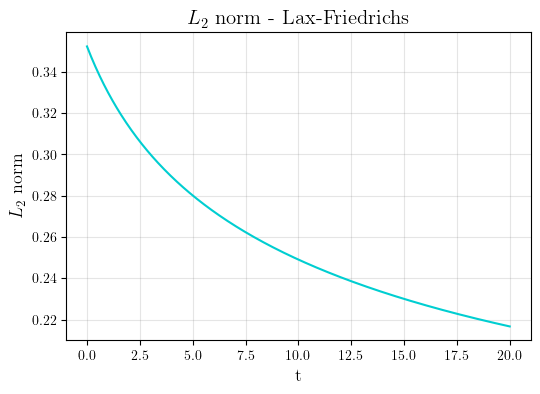

In [36]:
# Plot the l2 norm
plt.figure(figsize=(6, 4))
plt.plot(time, l2norm_LaxF, c = 'darkturquoise')
plt.title('$L_2$ norm - Lax-Friedrichs', fontsize = 15)
plt.xlabel('t', fontsize = 13)
plt.ylabel('$L_2$ norm', fontsize = 13)
plt.grid(alpha = 0.2, c = 'grey')
plt.show()

## Leapfrog

In [47]:
# Initialize the solution array
u_previous = u_initial.copy()     # This will be step zero, u_current will be computed with Lax-Friedrichs

#we create arrays where we will store the time and the l2norm
l2norm_Leap=[]
l2norm_Leap.append(np.sqrt(np.sum(u_previous**2)/len(u_previous)))

time=[]
time.append(0.0)

In [48]:
# Create directory to save images IF there isn't one yet
print(os.getcwd())
if not os.path.exists('./images_Leap'):
    os.makedirs('./images_Leap')
os.listdir('./')

C:\Users\lilit\reps\Numerical_relativity\Homework_1


['.ipynb_checkpoints',
 'Advection equation.ipynb',
 'images_FTCS',
 'images_LaxF',
 'images_Leap',
 'movie_FTCS.mp4',
 'movie_LaxF.mp4',
 'movie_Leap.mp4',
 'Numerical_Relativity_2025_exercise_01.pdf']

In [49]:
# Initialize time and iteration counter
t = 0.0
i = 0

#save the initial conditions
plt.plot(x, u_previous, c = 'darkturquoise')
plt.title('Time='+str(round(t,2)))
plt.ylim(0,1.1)
plt.xlabel('x', fontsize = 13)
plt.ylabel('u', rotation = 0, labelpad = 10, fontsize = 13)
plt.grid(alpha = 0.2, c = 'grey')
plt.savefig('./images_Leap/fig_'+str(i).zfill(5)+'.png', dpi=200)
plt.close()

# Solve the advection equation
# I need u^(n-1) -> I use Lax-Friedrichs for the first step (u_current):
u_current = 0.5*(np.roll(u_previous, -1) + np.roll(u_previous, 1)) - a*dt/(2*dx)*(np.roll(u_previous, -1) - np.roll(u_previous, 1))
t += dt
i += 1

# Saving this iteration
plt.plot(x, u_current, c = 'darkturquoise')
plt.title('Time='+str(round(t,2)))
plt.ylim(0,1.1)
plt.xlabel('x', fontsize = 13)
plt.ylabel('u', rotation = 0, labelpad = 10, fontsize = 13)
plt.grid(alpha = 0.2, c = 'grey')
plt.savefig('./images_Leap/fig_'+str(i).zfill(5)+'.png', dpi=200)
plt.close()

l2norm_Leap.append(np.sqrt(np.sum(u_current**2)/len(u_current)))
time.append(t)

while t < t_final:
    # Compute the new solution using the Leapfrog method
    u_next = u_previous - a*dt/dx*(np.roll(u_current, -1) - np.roll(u_current, 1))

    # Update the solution
    u_previous = u_current.copy()
    u_current = u_next.copy()

    #advance the time 
    t += dt
    i += 1
    
    #compute the l2 norm and add the time to the time vector
    l2norm_Leap.append(np.sqrt(np.sum(u_current**2)/len(u_current)))
    time.append(t)
    
    #plot the current result and save in an image every 10 iterations
    if (i%10==0):
        plt.plot(x, u_current, c = 'darkturquoise')
        plt.title('Time='+str(round(t,2)))
        plt.ylim(0,1.1)
        plt.xlabel('x', fontsize = 13)
        plt.ylabel('u', rotation = 0, labelpad = 10, fontsize = 13)
        plt.grid(alpha = 0.2, c = 'grey')
        plt.savefig('./images_Leap/fig_'+str(i).zfill(5)+'.png', dpi=200)
        plt.close()

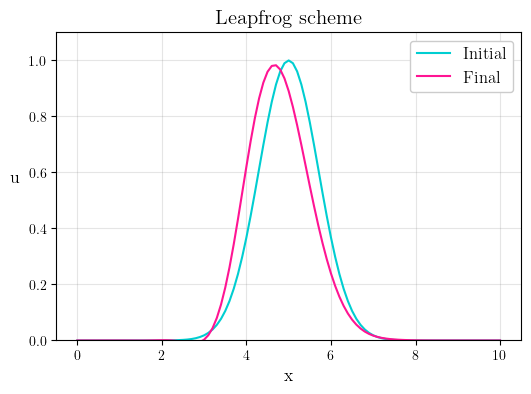

In [50]:
# Plot the final solution
plt.figure(figsize=(6, 4))
plt.plot(x, u_initial, label='Initial', c = 'darkturquoise')
plt.plot(x, u_current, label='Final', c = 'deeppink')
plt.title('Leapfrog scheme', fontsize = 15)
#plt.title('Time='+str(round(t,2)), fontsize = 15)
plt.ylim(0,1.1)
plt.xlabel('x', fontsize = 13)
plt.ylabel('u', rotation = 0, labelpad = 10, fontsize = 13)
plt.legend(fontsize = 12, framealpha = 1)
plt.grid(alpha = 0.2, c = 'grey')
plt.show()

In [51]:
# Check your current working directory
print(os.getcwd())

# Set the directory where the images are stored
directory = "./images_Leap/"

files = os.listdir(directory)
files = sorted(files)
print("\nSorted files:", files)
       
# Create the movie
with imageio.get_writer('./movie_Leap.mp4', mode='I', quality=10) as writer:
    for file in files:
        image = imageio.imread(os.path.join(directory, file))
        writer.append_data(image)

C:\Users\lilit\reps\Numerical_relativity\Homework_1

Sorted files: ['fig_00000.png', 'fig_00001.png', 'fig_00010.png', 'fig_00020.png', 'fig_00030.png', 'fig_00040.png', 'fig_00050.png', 'fig_00060.png', 'fig_00070.png', 'fig_00080.png', 'fig_00090.png', 'fig_00100.png', 'fig_00110.png', 'fig_00120.png', 'fig_00130.png', 'fig_00140.png', 'fig_00150.png', 'fig_00160.png', 'fig_00170.png', 'fig_00180.png', 'fig_00190.png', 'fig_00200.png', 'fig_00210.png', 'fig_00220.png', 'fig_00230.png', 'fig_00240.png', 'fig_00250.png', 'fig_00260.png', 'fig_00270.png', 'fig_00280.png', 'fig_00290.png', 'fig_00300.png', 'fig_00310.png', 'fig_00320.png', 'fig_00330.png', 'fig_00340.png', 'fig_00350.png', 'fig_00360.png', 'fig_00370.png', 'fig_00380.png', 'fig_00390.png', 'fig_00400.png']


In [52]:
# Displaying the movie

HTML("""
<div align="middle">
<video width="50%" controls>
      <source src="./movie_Leap.mp4" type="video/mp4">
</video></div>""")

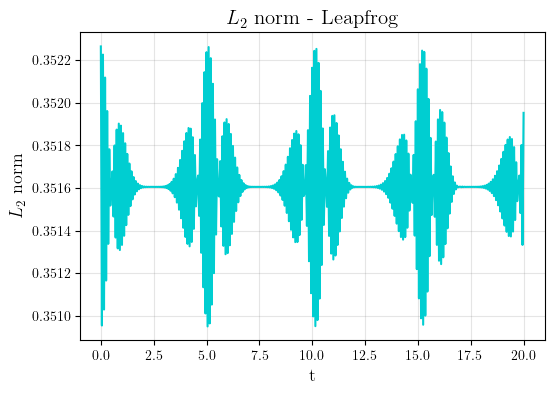

In [53]:
# Plot the l2 norm
plt.figure(figsize=(6, 4))
plt.plot(time, l2norm_Leap, c = 'darkturquoise')
plt.title('$L_2$ norm - Leapfrog', fontsize = 15)
plt.xlabel('t', fontsize = 13)
plt.ylabel('$L_2$ norm', fontsize = 13)
plt.grid(alpha = 0.2, c = 'grey')
plt.show()

## Lax-Wendroff

In [54]:
# Initialize the solution array
u_current = u_initial.copy()

#we create arrays where we will store the time and the l2norm
l2norm_LW=[]
l2norm_LW.append(np.sqrt(np.sum(u_current**2)/len(u_current)))

time=[]
time.append(0.0)

In [55]:
# Create directory to save images IF there isn't one yet
print(os.getcwd())
if not os.path.exists('./images_LW'):
    os.makedirs('./images_LW')
os.listdir('./')

C:\Users\lilit\reps\Numerical_relativity\Homework_1


['.ipynb_checkpoints',
 'Advection equation.ipynb',
 'images_FTCS',
 'images_LaxF',
 'images_Leap',
 'images_LW',
 'movie_FTCS.mp4',
 'movie_LaxF.mp4',
 'movie_Leap.mp4',
 'Numerical_Relativity_2025_exercise_01.pdf']

In [56]:
# Initialize time and iteration counter
t = 0.0
i = 0

#save the initial conditions
plt.plot(x, u_current, c = 'darkturquoise')
plt.title('Time='+str(round(t,2)))
plt.ylim(0,1.1)
plt.xlabel('x', fontsize = 13)
plt.ylabel('u', rotation = 0, labelpad = 10, fontsize = 13)
plt.grid(alpha = 0.2, c = 'grey')
plt.savefig('./images_LW/fig_'+str(i).zfill(5)+'.png', dpi=200)
plt.close()

#solve the advection equation
while t < t_final:
    # Compute the new solution using the Lax-Friedrichs method
    u_next = 0.5*(np.roll(u_current, -1) + np.roll(u_current, 1)) - a*dt/(2*dx)*(np.roll(u_current, -1) - np.roll(u_current, 1))
    u_next = u_current -a*dt/(2*dx)*(np.roll(u_current, -1) - np.roll(u_current, 1)) + (a**2 * dt**2)/(2 * dx**2)*(np.roll(u_current, -1) - 2*u_current + np.roll(u_current, 1))
    # Update the solution
    u_current = u_next.copy()

    #advance the time 
    t += dt
    i += 1
    
    #compute the l2 norm and add the time to the time vector
    l2norm_LW.append(np.sqrt(np.sum(u_current**2)/len(u_current)))
    time.append(t)
    
    #plot the current result and save in an image every 10 iterations
    if (i%10==0):
        plt.plot(x, u_current, c = 'darkturquoise')
        plt.title('Time='+str(round(t,2)))
        plt.ylim(0,1.1)
        plt.xlabel('x', fontsize = 13)
        plt.ylabel('u', rotation = 0, labelpad = 10, fontsize = 13)
        plt.grid(alpha = 0.2, c = 'grey')
        plt.savefig('./images_LW/fig_'+str(i).zfill(5)+'.png', dpi=200)
        plt.close()

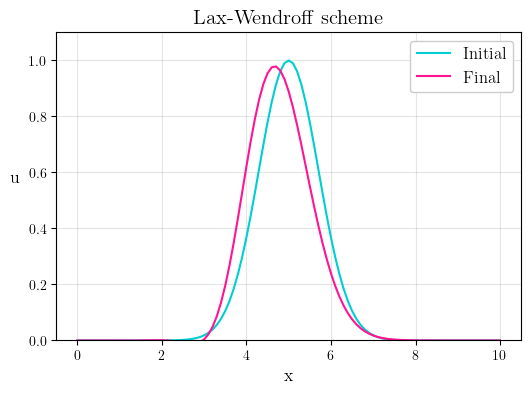

In [57]:
# Plot the final solution
plt.figure(figsize=(6, 4))
plt.plot(x, u_initial, label='Initial', c = 'darkturquoise')
plt.plot(x, u_current, label='Final', c = 'deeppink')
plt.title('Lax-Wendroff scheme', fontsize = 15)
#plt.title('Time='+str(round(t,2)), fontsize = 15)
plt.ylim(0,1.1)
plt.xlabel('x', fontsize = 13)
plt.ylabel('u', rotation = 0, labelpad = 10, fontsize = 13)
plt.legend(fontsize = 12, framealpha = 1)
plt.grid(alpha = 0.2, c = 'grey')
plt.show()

In [58]:
# Check your current working directory
print(os.getcwd())

# Set the directory where the images are stored
directory = "./images_LW/"

files = os.listdir(directory)
files = sorted(files)
print("\nSorted files:", files)
       
# Create the movie
with imageio.get_writer('./movie_LW.mp4', mode='I', quality=10) as writer:
    for file in files:
        image = imageio.imread(os.path.join(directory, file))
        writer.append_data(image)

C:\Users\lilit\reps\Numerical_relativity\Homework_1

Sorted files: ['fig_00000.png', 'fig_00010.png', 'fig_00020.png', 'fig_00030.png', 'fig_00040.png', 'fig_00050.png', 'fig_00060.png', 'fig_00070.png', 'fig_00080.png', 'fig_00090.png', 'fig_00100.png', 'fig_00110.png', 'fig_00120.png', 'fig_00130.png', 'fig_00140.png', 'fig_00150.png', 'fig_00160.png', 'fig_00170.png', 'fig_00180.png', 'fig_00190.png', 'fig_00200.png', 'fig_00210.png', 'fig_00220.png', 'fig_00230.png', 'fig_00240.png', 'fig_00250.png', 'fig_00260.png', 'fig_00270.png', 'fig_00280.png', 'fig_00290.png', 'fig_00300.png', 'fig_00310.png', 'fig_00320.png', 'fig_00330.png', 'fig_00340.png', 'fig_00350.png', 'fig_00360.png', 'fig_00370.png', 'fig_00380.png', 'fig_00390.png', 'fig_00400.png']


In [59]:
# Displaying the movie

HTML("""
<div align="middle">
<video width="50%" controls>
      <source src="./movie_LW.mp4" type="video/mp4">
</video></div>""")

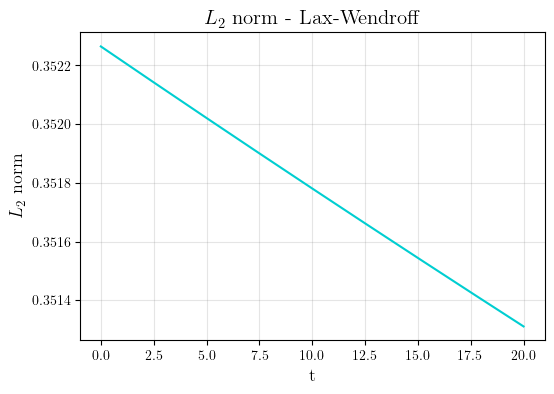

In [60]:
# Plot the l2 norm
plt.figure(figsize=(6, 4))
plt.plot(time, l2norm_LW, c = 'darkturquoise')
plt.title('$L_2$ norm - Lax-Wendroff', fontsize = 15)
plt.xlabel('t', fontsize = 13)
plt.ylabel('$L_2$ norm', fontsize = 13)
plt.grid(alpha = 0.2, c = 'grey')
plt.show()